# Evaluation on the Similarity of the Original Image and Generated Image

Using pre-trained **ResNet-50** model to determine the similarity score between two images



In [1]:
!pip install torch torchvision

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from scipy.spatial.distance import cosine

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load a pre-trained ResNet model
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define a transform to preprocess the image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Adjusted function to load an image and transform it
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Function to extract features using the PyTorch model
def extract_features(input_image, model):
    with torch.no_grad():  # Ensure no gradients are calculated
        features = model(input_image)
    return features

# Function to display an image

def display_images_horizontally(image_paths, figsize=(10, 5)):
    fig, axes = plt.subplots(1, len(image_paths), figsize=figsize)
    if len(image_paths) == 1:  # If there's only one image, encapsulate axes in a list.
        axes = [axes]
    for ax, image_path in zip(axes, image_paths):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')  # Don't show axis
    plt.tight_layout()  # Adjust the layout to not overlap
    plt.show()

# Load and preprocess images
# image1_path = '/content/drive/My Drive/523_test_folder/original.png'
# image2_path = '/content/drive/My Drive/523_test_folder/diffusion.png'
# image1 = load_image(image1_path)
# image2 = load_image(image2_path)

# # Extract features
# features1 = extract_features(image1, model)
# features2 = extract_features(image2, model)

# # Flatten the features and calculate cosine similarity
# features1_flat = features1.flatten(start_dim=1)
# features2_flat = features2.flatten(start_dim=1)
# similarity = torch.nn.functional.cosine_similarity(features1_flat, features2_flat, dim=0)

# similarity_scores = torch.nn.functional.cosine_similarity(features1_flat, features2_flat, dim=1)

# # Compute the mean of these similarity scores to get a single similarity value
# mean_similarity = similarity_scores.mean().item()

# print(f"Mean Similarity: {mean_similarity}")

# # Display images
# display_images_horizontally([image1_path, image2_path], figsize=(6, 3))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
def main(image1_path, image2_path):
    image1 = load_image(image1_path)
    image2 = load_image(image2_path)

    # Extract features
    features1 = extract_features(image1, model)
    features2 = extract_features(image2, model)

    # Flatten the features and calculate cosine similarity
    features1_flat = features1.flatten(start_dim=1)
    features2_flat = features2.flatten(start_dim=1)
    similarity = torch.nn.functional.cosine_similarity(features1_flat, features2_flat, dim=0)

    similarity_scores = torch.nn.functional.cosine_similarity(features1_flat, features2_flat, dim=1)

    # Compute the mean of these similarity scores to get a single similarity value
    mean_similarity = similarity_scores.mean().item()

    print(f"Mean Similarity: {mean_similarity}")

    # Display images
    display_images_horizontally([image1_path, image2_path], figsize=(6, 3))
    return

**Tests on similar samples:**

Mean Similarity: 0.7752051949501038


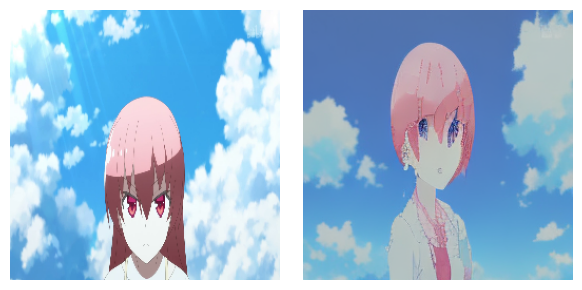

In [5]:
image1_path = '/content/drive/My Drive/523_test_folder/original.png'
image2_path = '/content/drive/My Drive/523_test_folder/diffusion.png'
main(image1_path, image2_path)

Mean Similarity: 0.7491081953048706


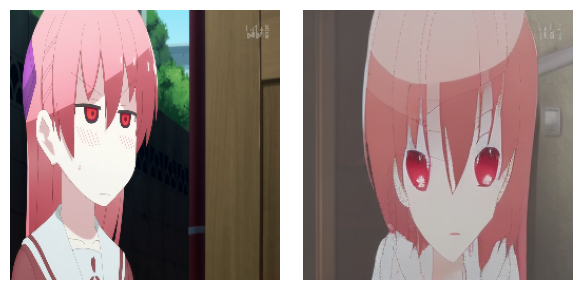

In [6]:
image1_path = '/content/drive/My Drive/523_test_folder/original2.png'
image2_path = '/content/drive/My Drive/523_test_folder/diffusion2.png'
main(image1_path, image2_path)

**Tests on not very similar samples**

Mean Similarity: 0.5905771851539612


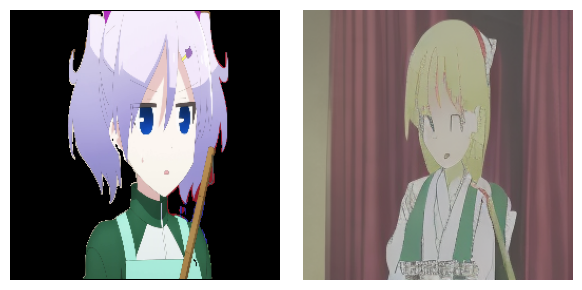

In [7]:
image1_path = '/content/drive/My Drive/523_test_folder/original4.png'
image2_path = '/content/drive/My Drive/523_test_folder/diffusion4.png'
main(image1_path, image2_path)

**Tests on similar non-humanlike samples**

Mean Similarity: 0.7343300580978394


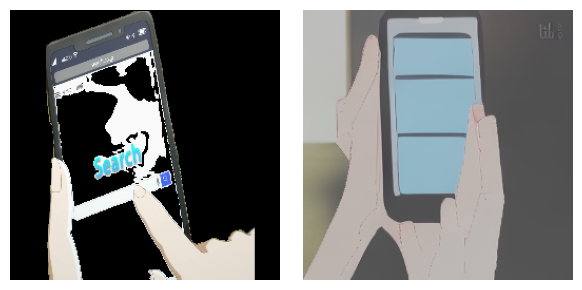

In [9]:
image1_path = '/content/drive/My Drive/523_test_folder/orignal_phone.png'
image2_path = '/content/drive/My Drive/523_test_folder/phone2.png'
main(image1_path, image2_path)

Mean Similarity: 0.7114693522453308


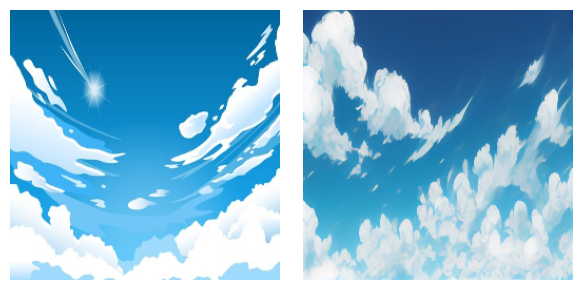

In [10]:
image1_path = '/content/drive/My Drive/523_test_folder/sky.png'
image2_path = '/content/drive/My Drive/523_test_folder/sky2.png'
main(image1_path, image2_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Similarity: 0.7623943090438843


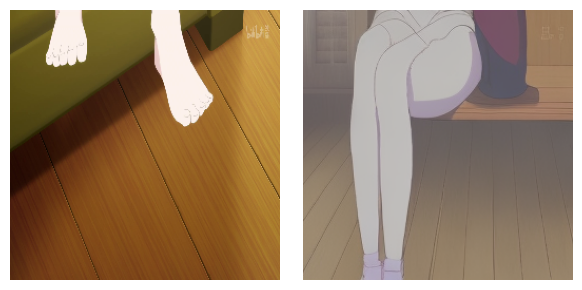

In [12]:
drive.mount('/content/drive')
image1_path = '/content/drive/My Drive/523_test_folder/feet.png'
image2_path = '/content/drive/My Drive/523_test_folder/feet2.png'
main(image1_path, image2_path)

**Tests on unrelated samples**

Mean Similarity: 0.3325565457344055


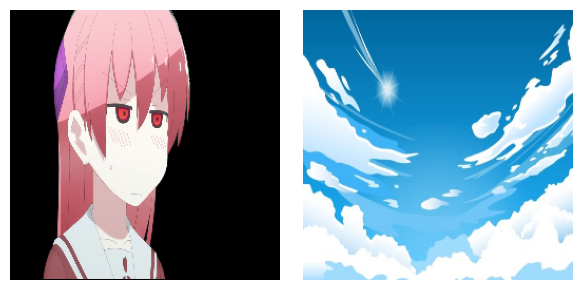

In [13]:
image1_path = '/content/drive/My Drive/523_test_folder/segment.png'
image2_path = '/content/drive/My Drive/523_test_folder/phone2.png'
main(image1_path, image2_path)

Mean Similarity: 0.5743699669837952


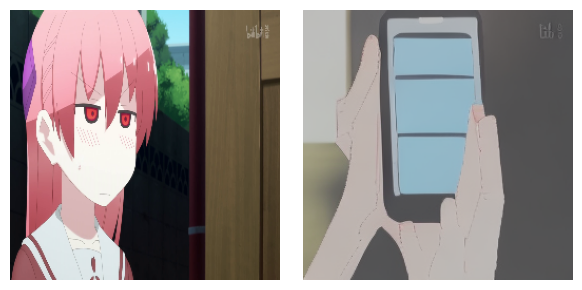

In [14]:
image1_path = '/content/drive/My Drive/523_test_folder/original2.png'
image2_path = '/content/drive/My Drive/523_test_folder/phone2.png'
main(image1_path, image2_path)

# Evaluation on the correlation of the Original Prompt and Generated Image

Using pre-trained **clip-vit-base-patch32** model to determine the correlation score between the prompt and the generated image


In [38]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

def calculate_text_image_correlation(image_path, text, model_name='openai/clip-vit-base-patch32'):
    # Initialize CLIP model and processor
    model = CLIPModel.from_pretrained(model_name)
    processor = CLIPProcessor.from_pretrained(model_name)

    # Load and preprocess the image
    image = Image.open(image_path).resize((256, 256))

    # Truncate or pad the text to the model's maximum input length
    # This ensures the input text is not longer than what the model can handle
    inputs = processor(text=[text], images=image, return_tensors="pt", padding=True, truncation=True)

    # Forward pass through the model to get text and image embeddings
    outputs = model(**inputs)
    text_embeddings = outputs.text_embeds  # Text embeddings
    image_embeddings = outputs.image_embeds  # Image embeddings

    # Calculate cosine similarity between text and image embeddings
    similarity = torch.nn.functional.cosine_similarity(text_embeddings, image_embeddings)

    return similarity.item()

def display_image(image_path, figsize=(5, 5)):
    image = Image.open(image_path)
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis('off')  # Don't show axis
    plt.show()

**Tests on similar prompt and image**

Similarity score: 0.28577497601509094


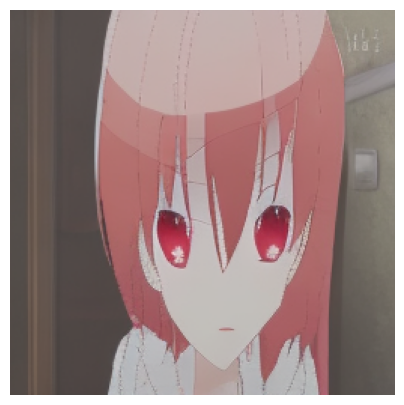

This is a Japanese anime style image. The image features a young woman with red hair, wearing a white shirt and a red bow. She appears to be a character from a manga or anime, possibly a princess. The woman is standing in front of a door, possibly a castle entrance. The scene is set in a dark environment, which adds to the dramatic atmosphere of the image.


In [39]:
image_path = '/content/drive/My Drive/523_test_folder/diffusion2.png'
prompt = ("This is a Japanese anime style image. The image features a young woman with red hair, "
          "wearing a white shirt and a red bow. She appears to be a character from a manga or anime, "
          "possibly a princess. The woman is standing in front of a door, possibly a castle entrance. "
          "The scene is set in a dark environment, which adds to the dramatic atmosphere of the image.")

similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)

Similarity score: 0.310035765171051


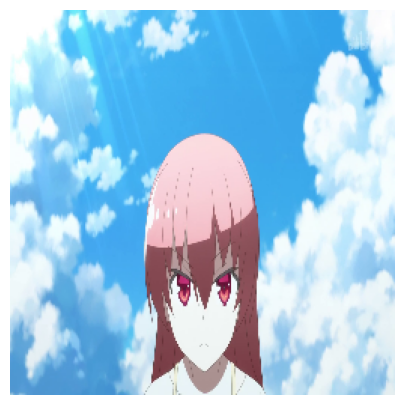

This is a Japanese anime style image. The image features a woman with pink hair, standing in front of a cloudy blue sky. She appears to be looking at the camera, possibly posing for a picture. The woman is wearing a necklace, adding a touch of style to her appearance. The scene is set against a backdrop of a cloudy blue sky, creating a visually striking contrast between the woman and her surroundings.


In [35]:
image_path = '/content/drive/My Drive/523_test_folder/original.png'
prompt = 'This is a Japanese anime style image. The image features a woman with pink hair, standing in front of a cloudy blue sky. She appears to be looking at the camera, possibly posing for a picture. The woman is wearing a necklace, adding a touch of style to her appearance. The scene is set against a backdrop of a cloudy blue sky, creating a visually striking contrast between the woman and her surroundings.'
similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)

**Tests on similar non-humanlike prompt and image**

Similarity score: 0.34790459275245667


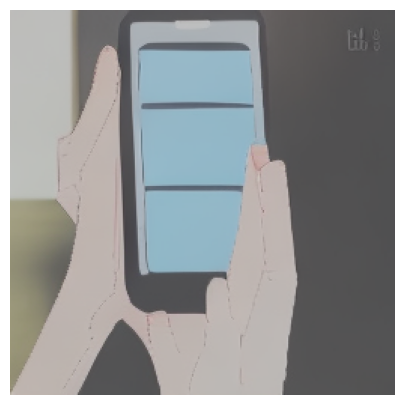

This is a Japanese anime style image. In the image, a person is holding a cell phone with a search button displayed on the screen. The cell phone is positioned in the foreground, occupying a significant portion of the image. The persons hand is visible, holding the phone. The surrounding area consists of a carpeted floor, which is the main background of the image. The focus of the scene is on the cell phone and the persons interaction with it, highlighting the importance of technology in modern life.


In [33]:
image_path = '/content/drive/My Drive/523_test_folder/phone2.png'
prompt = 'This is a Japanese anime style image. In the image, a person is holding a cell phone with a search button displayed on the screen. The cell phone is positioned in the foreground, occupying a significant portion of the image. The persons hand is visible, holding the phone. The surrounding area consists of a carpeted floor, which is the main background of the image. The focus of the scene is on the cell phone and the persons interaction with it, highlighting the importance of technology in modern life.'
similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)

Similarity score: 0.3596685528755188


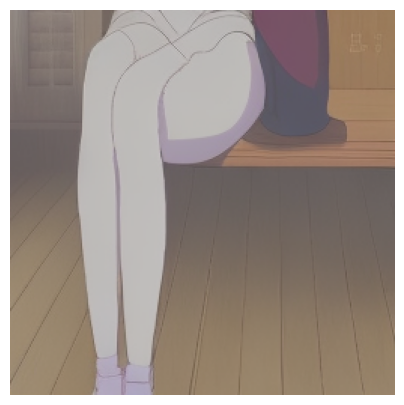

This is a Japanese anime style image. The image features a person, likely a woman, sitting on a wooden bench. The person is wearing white socks and appears to be relaxed or contemplating. The bench is located in a room with a hardwood floor, and the scene seems to be a casual, indoor setting.


In [40]:
image_path = '/content/drive/My Drive/523_test_folder/feet2.png'
prompt = 'This is a Japanese anime style image. The image features a person, likely a woman, sitting on a wooden bench. The person is wearing white socks and appears to be relaxed or contemplating. The bench is located in a room with a hardwood floor, and the scene seems to be a casual, indoor setting.'

similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)

**Tests on unrelated prompt and image: character image and non-human prompt**

Similarity score: 0.24876636266708374


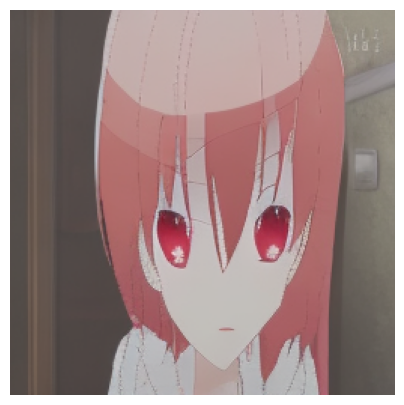

This is a Japanese anime style image. In the image, a person is holding a cell phone with a search button displayed on the screen. The cell phone is positioned in the foreground, occupying a significant portion of the image. The persons hand is visible, holding the phone. The surrounding area consists of a carpeted floor, which is the main background of the image. The focus of the scene is on the cell phone and the persons interaction with it, highlighting the importance of technology in modern life.


In [34]:
image_path = '/content/drive/My Drive/523_test_folder/diffusion2.png'
prompt = 'This is a Japanese anime style image. In the image, a person is holding a cell phone with a search button displayed on the screen. The cell phone is positioned in the foreground, occupying a significant portion of the image. The persons hand is visible, holding the phone. The surrounding area consists of a carpeted floor, which is the main background of the image. The focus of the scene is on the cell phone and the persons interaction with it, highlighting the importance of technology in modern life.'
similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)

**Tests on unrelated prompt and image: non-human image and character prompt**

Similarity score: 0.21075476706027985


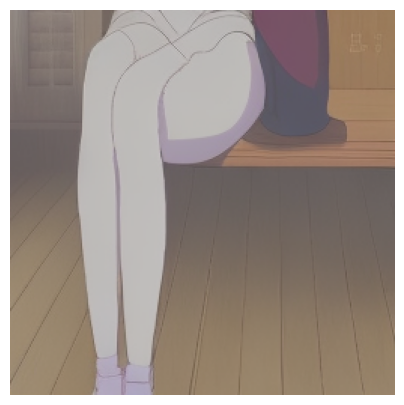

This is a Japanese anime style image. The image features a woman with pink hair, standing in front of a cloudy blue sky. She appears to be looking at the camera, possibly posing for a picture. The woman is wearing a necklace, adding a touch of style to her appearance. The scene is set against a backdrop of a cloudy blue sky, creating a visually striking contrast between the woman and her surroundings.


In [41]:
image_path = '/content/drive/My Drive/523_test_folder/feet2.png'
prompt = 'This is a Japanese anime style image. The image features a woman with pink hair, standing in front of a cloudy blue sky. She appears to be looking at the camera, possibly posing for a picture. The woman is wearing a necklace, adding a touch of style to her appearance. The scene is set against a backdrop of a cloudy blue sky, creating a visually striking contrast between the woman and her surroundings.'

similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)

**Tests on unrelated prompt and image: character image and character prompt**

Similarity score: 0.1957443505525589


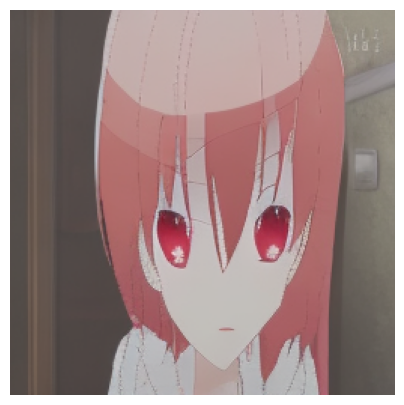

This is a Japanese anime style image. The image features a woman with pink hair, standing in front of a cloudy blue sky. She appears to be looking at the camera, possibly posing for a picture. The woman is wearing a necklace, adding a touch of style to her appearance. The scene is set against a backdrop of a cloudy blue sky, creating a visually striking contrast between the woman and her surroundings.


In [42]:
image_path = '/content/drive/My Drive/523_test_folder/diffusion2.png'
prompt = 'This is a Japanese anime style image. The image features a woman with pink hair, standing in front of a cloudy blue sky. She appears to be looking at the camera, possibly posing for a picture. The woman is wearing a necklace, adding a touch of style to her appearance. The scene is set against a backdrop of a cloudy blue sky, creating a visually striking contrast between the woman and her surroundings.'

similarity_score = calculate_text_image_correlation(image_path, prompt)
print(f"Similarity score: {similarity_score}")
display_image(image_path)
print(prompt)